In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [137]:
parent_path = str(os.path.dirname(os.getcwd()))
reds = pd.read_csv(parent_path + "/data/winequality-red.csv", delimiter = ";")
whites = pd.read_csv(parent_path + "/data/winequality-white.csv", delimiter = ";")
reds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#description of red wine
reds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
#description of white wine
whites.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


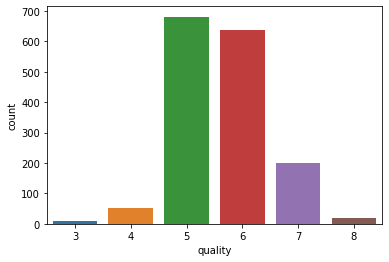

In [5]:
#distribution of target var
sns.countplot(x='quality', data=reds)

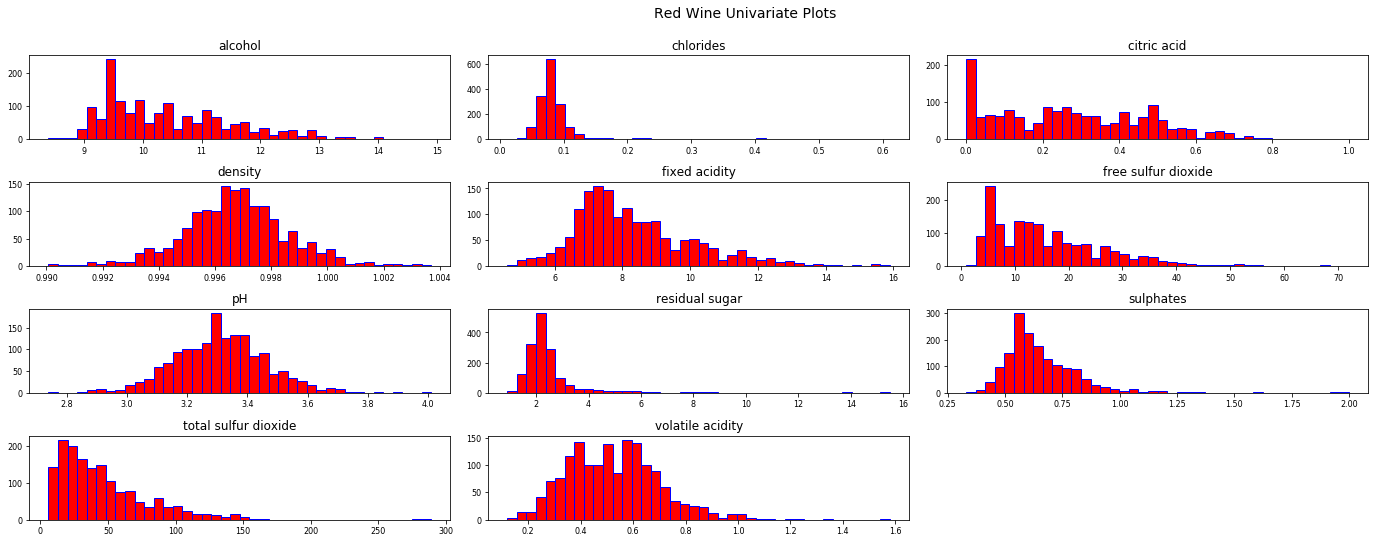

In [6]:
#input var distribution visulization reds
target = 'quality'
features_list = list(reds.columns)
features_list.remove(target)
reds[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14); 

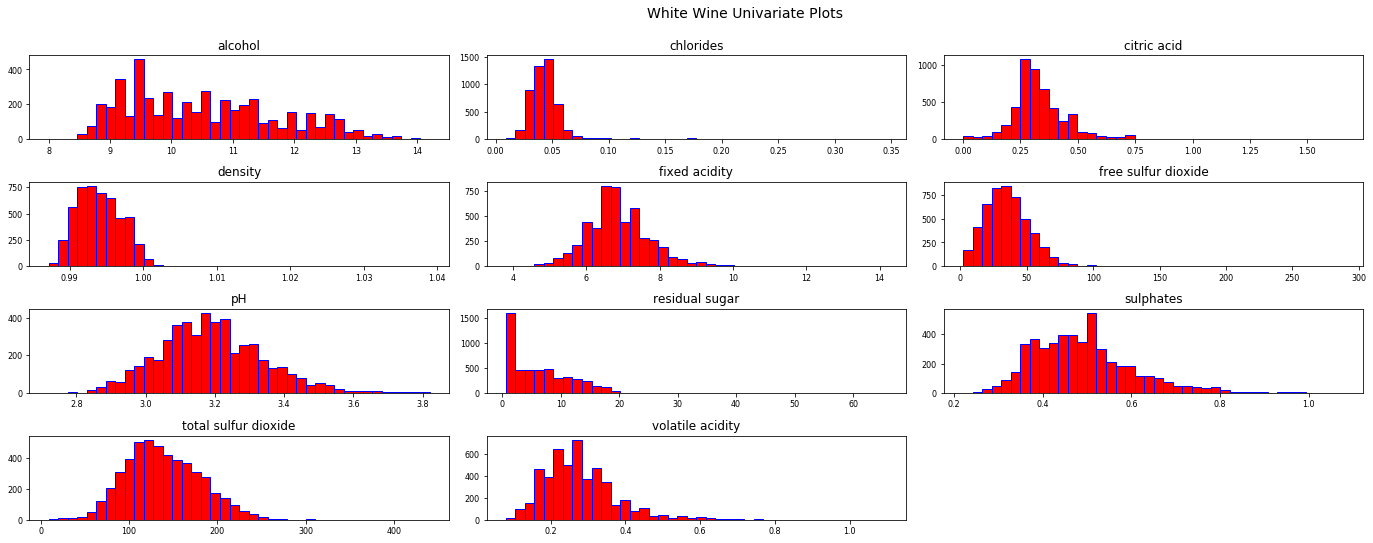

In [7]:
#input var distribution visulization whites
target = 'quality'
features_list = list(reds.columns)
features_list.remove(target)
whites[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=14); 

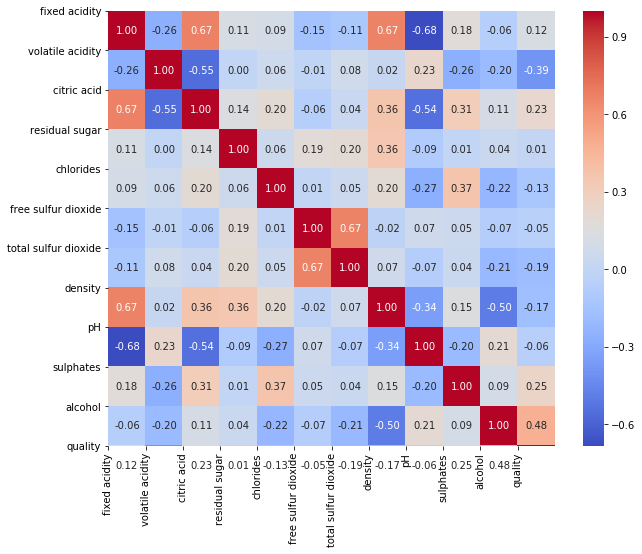

In [8]:
#correlation heat map_red wine
corr = reds.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

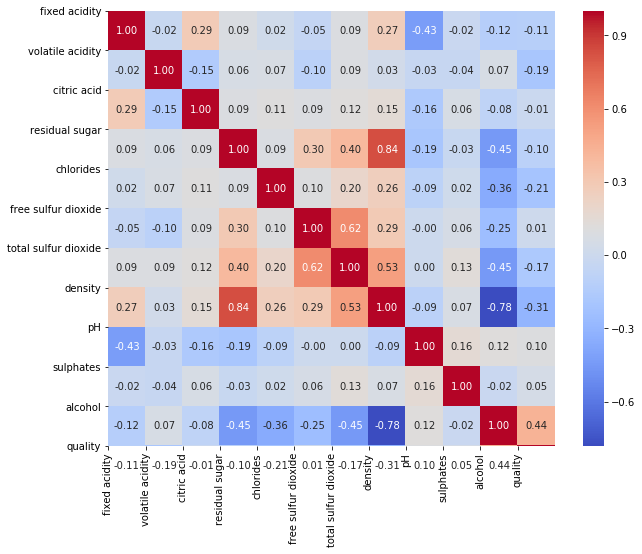

In [9]:
#correlation heat map_white wine
corr = whites.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

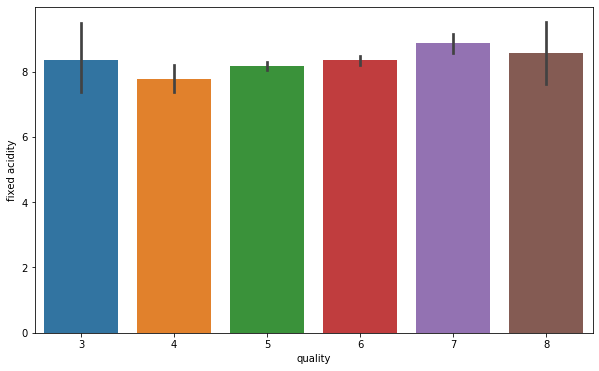

In [10]:
#visualize how does input var is related to target var,if the plot has a clear pattern, that certain input var might 
#has strong correlation to the target
#red wine
#fixed acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = reds)

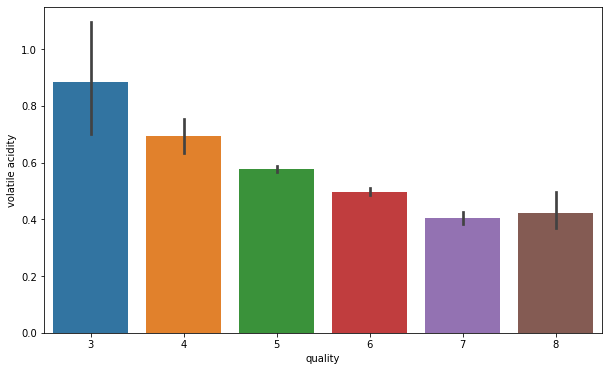

In [11]:
#volatile acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = reds)

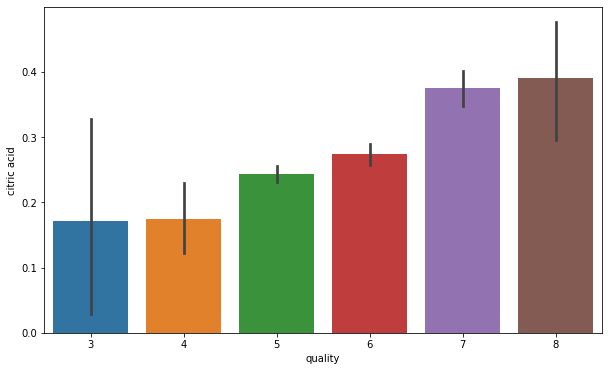

In [12]:
#citric acid
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = reds)

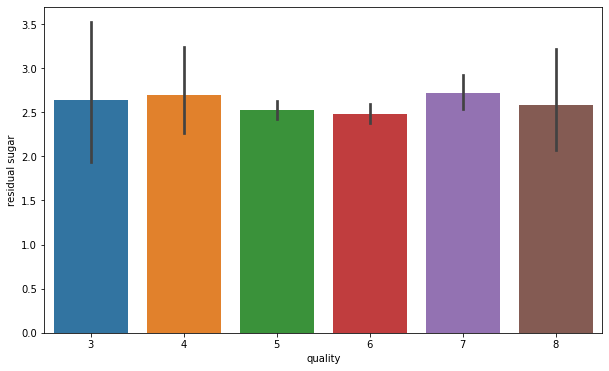

In [13]:
#residual sugar
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = reds)

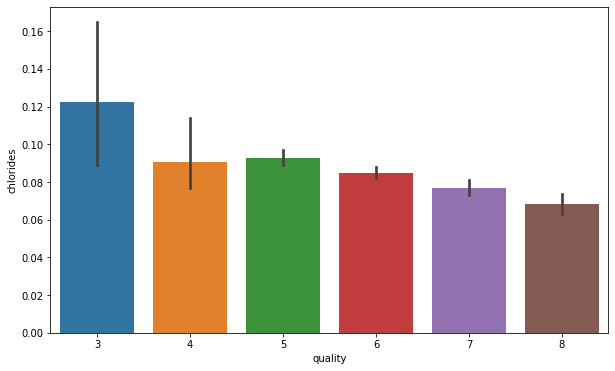

In [14]:
#chlorides
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = reds)

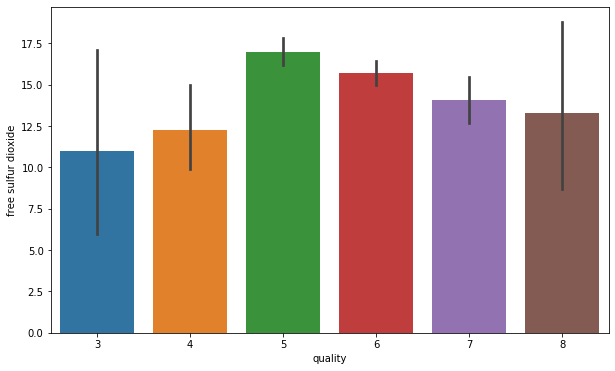

In [15]:
#free sulfur dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = reds)

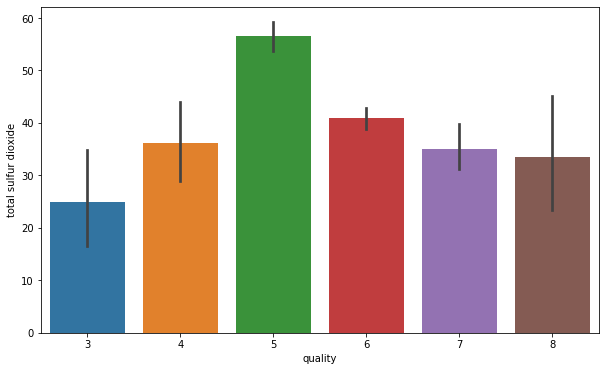

In [16]:
#total sulfur dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = reds)

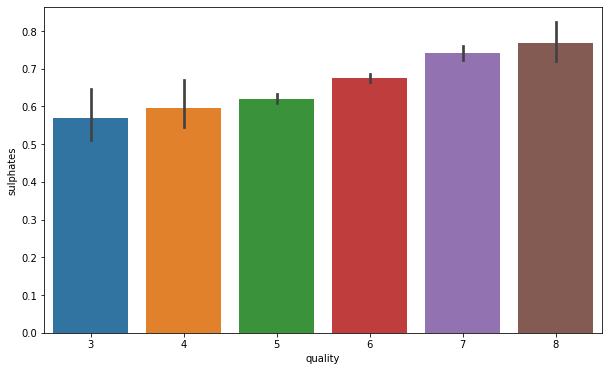

In [17]:
#sulphates
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = reds)

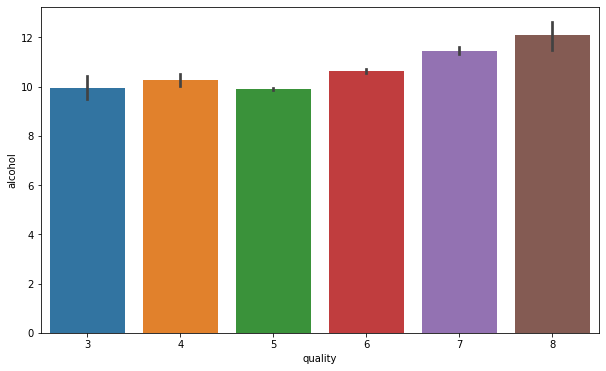

In [18]:
#alcohol
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = reds)

In [19]:
#outlier for reds
Q1 = reds.quantile(0.25)
Q3 = reds.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [20]:
reds_out = reds[~((reds < (Q1 - 1.5 * IQR)) |(reds > (Q3 + 1.5 * IQR))).any(axis=1)]
reds.shape

(1599, 12)

In [21]:
#outlier for whites
Q1 = whites.quantile(0.25)
Q3 = whites.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64


In [22]:
whites_out = whites[~((whites < (Q1 - 1.5 * IQR)) |(whites > (Q3 + 1.5 * IQR))).any(axis=1)]
whites.shape

(4898, 12)

In [23]:
X_reds = reds.drop('quality', axis = 1).values
Y_reds= reds['quality'].values.reshape(-1,1)
#linear regression and multicollinearity for reds
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_reds, Y_reds)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
reds.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

## VIF 

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_reds = pd.DataFrame()
vif_reds["feature"] = reds.columns[:-1]

vif_reds["VIF"] = [variance_inflation_factor(reds[reds.columns[:-1]].values, i) 
                          for i in range(len(reds[reds.columns[:-1]].columns))] 

vif_reds

,feature,VIF
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


In [38]:
vif_whites = pd.DataFrame()
vif_whites["feature"] = whites.columns[:-1]
vif_whites["VIF"] = [variance_inflation_factor(whites[whites.columns[:-1]].values, i) 
                          for i in range(len(whites[whites.columns[:-1]].columns))] 

vif_whites

,feature,VIF
0,fixed acidity,92.861483
1,volatile acidity,9.730569
2,citric acid,10.007114
3,residual sugar,3.830272
4,chlorides,6.497448
5,free sulfur dioxide,9.261556
6,total sulfur dioxide,24.980802
7,density,1056.497431
8,pH,609.861725
9,sulphates,20.527123


In [158]:
from sklearn.preprocessing import StandardScaler

X_reds = reds.drop("quality", axis=1)
scaler = StandardScaler()
X_reds_scaled = StandardScaler().fit_transform(X_reds)
X_reds_scaled = pd.DataFrame(X_reds_scaled, index=X_reds.index, columns=X_reds.columns)
Y_reds = reds["quality"]

X_whites = whites.drop("quality", axis=1)
scaler = StandardScaler()
X_whites_scaled = StandardScaler().fit_transform(X_whites)
X_whites_scaled = pd.DataFrame(X_whites_scaled, index=X_whites.index, columns=X_whites.columns)
Y_whites = whites["quality"]

In [199]:
#Convert the target variable to binary
Y_reds = pd.Series(Y_reds >= 7, dtype=int)
Y_whites = pd.Series(Y_whites >= 7, dtype=int)

In [130]:
X_reds_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [60]:
X_whites_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


In [195]:
vif_reds_scaled = pd.DataFrame()
vif_reds_scaled["feature"] = X_reds_scaled.columns

vif_reds_scaled["VIF"] = [variance_inflation_factor(X_reds_scaled.values, i) 
                          for i in range(len(X_reds_scaled.columns))] 

vif_reds_scaled

,feature,VIF
0,fixed acidity,7.767512
1,volatile acidity,1.789390
2,citric acid,3.128022
3,residual sugar,1.702588
4,chlorides,1.481932
5,free sulfur dioxide,1.963019
6,total sulfur dioxide,2.186813
7,density,6.343760
8,pH,3.329732
9,sulphates,1.429434


In [196]:
#remove feature with the highest VIF

vif_reds_scaled_2 = pd.DataFrame()
vif_reds_scaled_2["feature"] = X_reds_scaled.columns[1:]

vif_reds_scaled_2["VIF"] = [variance_inflation_factor(X_reds_scaled.drop("fixed acidity", axis=1).values, i) 
                          for i in range(len(X_reds_scaled.drop("fixed acidity", axis=1).columns))] 

vif_reds_scaled_2

,feature,VIF
0,volatile acidity,1.784963
1,citric acid,2.780557
2,residual sugar,1.386375
3,chlorides,1.401232
4,free sulfur dioxide,1.939209
5,total sulfur dioxide,2.069396
6,density,2.430096
7,pH,1.610775
8,sulphates,1.396382
9,alcohol,2.136067


In [197]:
vif_whites_scaled = pd.DataFrame()
vif_whites_scaled["feature"] = X_whites_scaled.columns

vif_whites_scaled["VIF"] = [variance_inflation_factor(X_whites_scaled.values, i) 
                          for i in range(len(X_whites_scaled.columns))] 

vif_whites_scaled

,feature,VIF
0,fixed acidity,2.691435
1,volatile acidity,1.141156
2,citric acid,1.165215
3,residual sugar,12.644064
4,chlorides,1.236822
5,free sulfur dioxide,1.787880
6,total sulfur dioxide,2.239233
7,density,28.232546
8,pH,2.196362
9,sulphates,1.138540


In [198]:
#remove feature with the highest VIF

vif_whites_scaled_2 = pd.DataFrame()
vif_whites_scaled_2["feature"] = X_whites_scaled.drop("density",axis = 1).columns

vif_whites_scaled_2["VIF"] = [variance_inflation_factor(X_whites_scaled.drop("density",axis = 1).values, i) 
                          for i in range(len(X_whites_scaled.drop("density",axis = 1).columns))] 

vif_whites_scaled_2

,feature,VIF
0,fixed acidity,1.356128
1,volatile acidity,1.128298
2,citric acid,1.159884
3,residual sugar,1.435215
4,chlorides,1.203645
5,free sulfur dioxide,1.744627
6,total sulfur dioxide,2.153170
7,pH,1.330912
8,sulphates,1.056637
9,alcohol,1.647117


In [190]:
from sklearn.model_selection import train_test_split
X_reds_train, X_reds_test, Y_reds_train, Y_reds_test = train_test_split(X_reds_scaled, Y_reds, test_size=0.33, random_state=20)

In [191]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000).fit(X_reds_train, Y_reds_train)
lr_predict = lr.predict(X_reds_test)
lr_predict_prob = lr.predict_proba(X_reds_test)[:,1]

C:\Users\sukan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [192]:
lr_vif = LogisticRegression(max_iter = 1000).fit(X_reds_train.drop("fixed acidity", axis=1), Y_reds_train)
lr_predict_vif = lr_vif.predict(X_reds_test.drop("fixed acidity", axis=1))
lr_predict_prob_vif = lr_vif.predict_proba(X_reds_test.drop("fixed acidity", axis=1))[:,1]

C:\Users\sukan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [193]:
from sklearn.metrics import roc_curve, auc

def plot_ROC(truth,preds,label_string):
    fpr, tpr, thresholds = roc_curve(truth,preds)
    roc_auc = auc(fpr,tpr)
    
    
    #choose a random color for plotting:
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

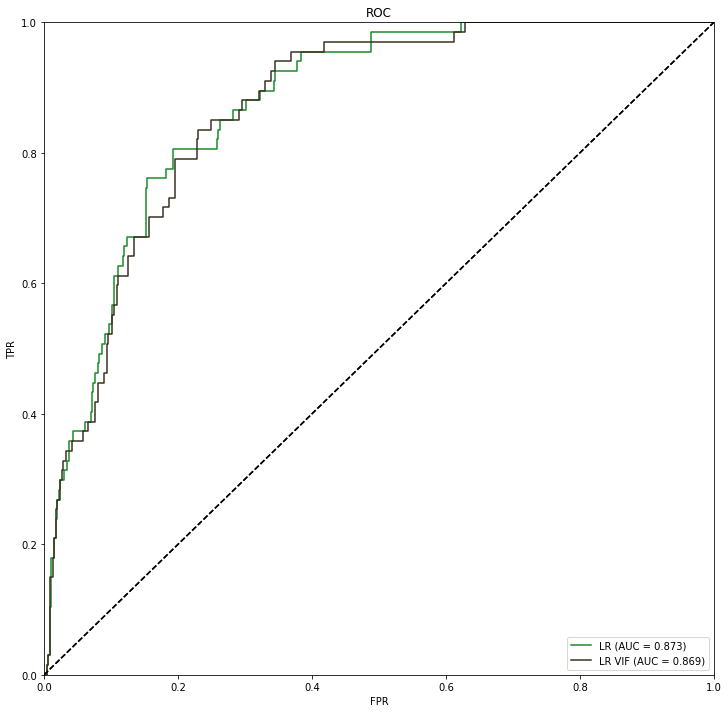

In [194]:
plt.rcParams['figure.figsize'] = 12, 12
plot_ROC(Y_reds_test,lr_predict_prob,"LR")
plot_ROC(Y_reds_test,lr_predict_prob_vif,"LR VIF")


In [203]:
X_whites_train, X_whites_test, Y_whites_train, Y_whites_test = train_test_split(X_whites_scaled, Y_whites, test_size=0.33, random_state=30)

In [204]:
lr = LogisticRegression(max_iter = 1000).fit(X_whites_train, Y_whites_train)
lr_predict_prob_whites = lr.predict_proba(X_whites_test)[:,1]

lr_vif = LogisticRegression(max_iter = 1000).fit(X_whites_train.drop("density", axis=1), Y_whites_train)
lr_predict_prob_vif_whites = lr_vif.predict_proba(X_whites_test.drop("density", axis=1))[:,1]

C:\Users\sukan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sukan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


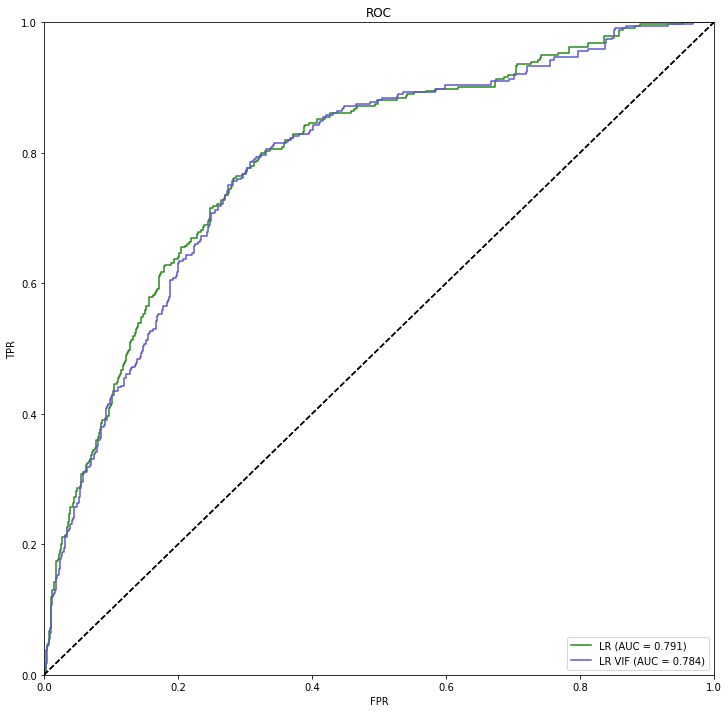

In [205]:
plt.rcParams['figure.figsize'] = 12, 12
plot_ROC(Y_whites_test,lr_predict_prob_whites,"LR")
plot_ROC(Y_whites_test,lr_predict_prob_vif_whites,"LR VIF")